xx = (201, 201)
yy = (201, 201)
f2t = (40401,)
(201, 201)
init = (201,)


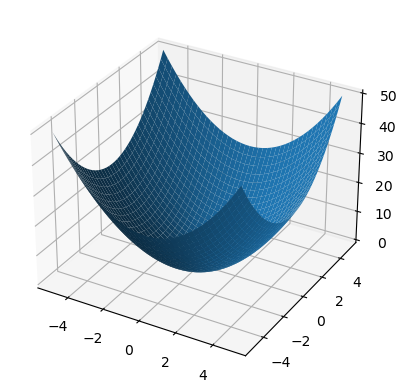

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy import optimize
from numpy.random import rand

x = np.linspace(-5,5,201)
y = np.linspace(-5,5,201)
# print("x = ",x.shape)
# print("y = ",y.shape)
def f(x,y):
     return x ** 2 + y ** 2

def f2(x):
    return x[:,0] ** 2 + x[:,1] ** 2 
    
xx,yy = np.meshgrid(x,y)    
# z = f(xx,yy)
t = np.array([xx.flatten(),yy.flatten()]).T
# print(xx.flatten().shape)
# print(t.shape)
print("xx =", xx.shape) 
print("yy =", yy.shape)
print("f2t =", f2(t).shape)
z = f2(t).reshape(201,201)  
print(z.shape)
ax = plt.figure().add_subplot(projection = "3d")
ax.plot_surface(xx,yy,z)
r_min, r_max = -5.0, 5.0
init_pt = r_min + rand(201) * (r_max - r_min)
print("init =",init_pt.shape)


In [11]:
# The default (Nelder Mead)
result = optimize.minimize(f2,x0 = init_pt, method='Nelder-Mead', bounds=None ,options={'disp': True, 'return_all': True,})
xf_func = result["x"] 
plt.subplot(2,2,1)
plt.plot(xf_func, func(xf_func), "o")

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
#BFGS
result2 = optimize.minimize(func, x0=3, method='BFGS', jac= None, tol=0.001 , options={'gtol': 1e-05, 'norm': np.inf, 'eps': 1.4901161193847656e-08, 'maxiter': None, 'disp': True, 'return_all': True, 'finite_diff_rel_step': None})
xf2_func = result2["x"]
plt.plot(xf2_func, func(xf2_func), "o")

jac_func = result2["jac"]
plt.subplot(2,2,2)
plt.plot(jac_func, "o")

In [ ]:
#CG
result3 = optimize.minimize(func, x0=3, method='CG', jac=None, tol=0.001, options={'gtol': 1e-05, 'norm': np.inf, 'eps': 1.4901161193847656e-08, 'maxiter': None, 'disp': True, 'return_all': True, 'finite_diff_rel_step': None})
xf3_func = result3["x"]
plt.plot(xf3_func, func(xf3_func), "o")
jac_func2 = result3["jac"]
plt.subplot(2,2,3)
plt.plot(jac_func2, "o")

In [ ]:
#Newton-CG
result4 = optimize.minimize(func, x0 = 3,method='Newton-CG', jac= func, hess= func, hessp=None, tol=0.001, options={'xtol': 1e-05, 'eps': 1.4901161193847656e-08, 'maxiter': None, 'disp': True, 'return_all': True})
xf4_func = result4["x"]
plt.plot(xf4_func, func(xf4_func), "o")
jac_func3 = result4["jac"]
plt.subplot(2,2,4)
plt.plot(jac_func3, "o")